In [4]:
from preprocessing import convert_voc_to_yolo
import os
os.chdir('yolov5')

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import itertools
import os
import subprocess

In [6]:
!python train.py --img 320 --batch 8 --epochs 10 --data VOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=VOC.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-348-g6deb2d75 Python-3.10.9 torch-2.4.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.0

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\harsh/.cache\torch\hub\master.zip
YOLOv5  2024-7-29 Python-3.10.9 torch-2.4.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\harsh/.cache\torch\hub\ultralytics_yolov5_master\models

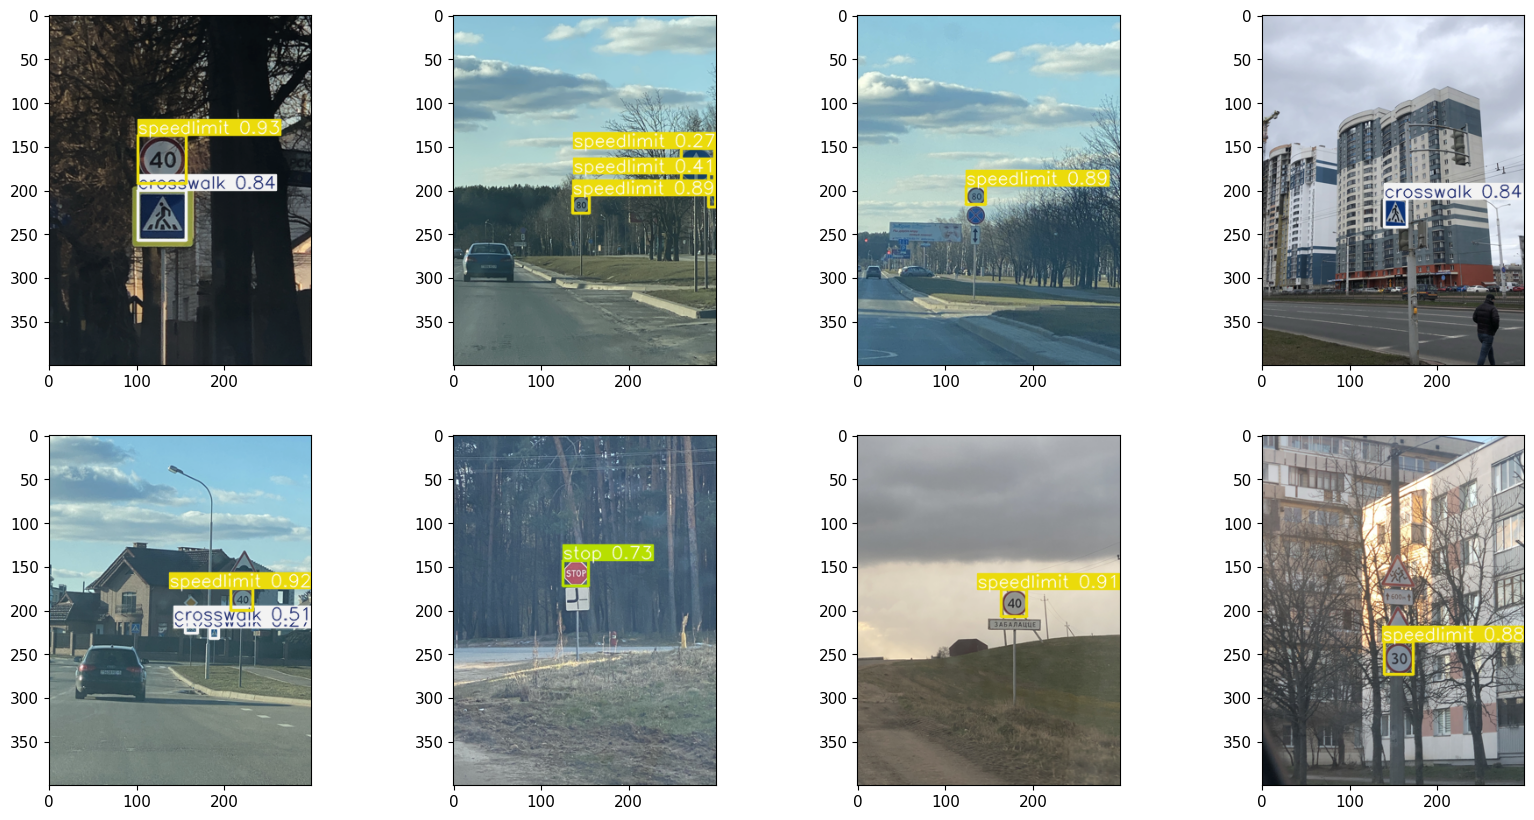

In [28]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize=(20,10))
os.chdir('C:/Users/harsh/Desktop/Projects/Traffic_Sign_detection')
imgs = os.listdir('./data/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))